# **Project Name - Mobile Price Range Prediction**


Project Type - Classification (ML)

Contribution - Individual

Name - MD Ahsan

<b><h4>Github Link</b></h4>

Github Link - https://github.com/Ahsan2345/Mobile-Price-Range-Prediction

Email - ahsanmgs126@gmail.com

<b><h3>In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

<b>Data Description</b> 

 <b>1.   Battery_power -</b> Total energy a battery can store in one time 
 measured in mAh

<b>2. Blue -</b> Has bluetooth or not

<b>3. Clock_speed -</b> speed at which microprocessor executes instructions

<b>4. Dual_sim -</b> Has dual sim support or not

<b>5. Fc -</b> Front Camera mega pixels

<b>6. Four_g -</b> Has 4G or not

<b>7. Int_memory -</b> Internal Memory in Gigabytes

<b>8. M_dep -</b> Mobile Depth in cm

<b>9. Mobile_wt -</b> Weight of mobile phone

<b>10. N_cores -</b> Number of cores of processor

<b>11. Pc -</b> Primary Camera mega pixels

<b>12. Px_height -</b> Pixel Resolution Height

<b>13. Px_width -</b> Pixel Resolution Width

<b>14. Ram -</b> Random Access Memory in Mega Bytes

<b>15. Sc_h -</b> Screen Height of mobile in cm

<b>16. Sc_w -</b> Screen Width of mobile in cm

<b>17. Talk_time -</b> longest time that a single battery charge will last when you are

<b>18. Three_g -</b> Has 3G or not

<b>19. Touch_screen -</b> Has touch screen or not

<b>20. Wifi -</b> Has wifi or not

<b>21. Price_range -</b> This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [ ]:
#Importing Important Labraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CSV file location path
df = pd.read_csv("/content/data_mobile_price_range.csv")

In [ ]:
# importing CSV file into pandas dataframe
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
# first 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# lets check shape of data
df.shape

(2000, 21)

In [ ]:
# check lenght of data
len(df)

2000

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**<h4>Thus we have handled the mismatched values of the data.**

In [ ]:
# Checking the data types, non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

* **We don't have any object data type in our data set.**
* **Also we have Zero null values in data set.**
* **Price_range is our target variable.**

In [ ]:
# Checking Null Values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# Checking Statistic of the data
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Some Basic Observations:
* We can see that sc_width and px_height has minimum value 0. which is not possible in any mobile. We need to handle this mismatch.

In [ ]:
# Total phones with sc_w = 0
print(len(df[df.sc_w == 0]))
# Total phones with px_height = 0
print(len(df[df.px_height == 0]))

180
2


In [ ]:
#where their is sc_W and px_height is zero ,assigning mean value
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

<ipython-input-61-d574cf24217a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
<ipython-input-61-d574cf24217a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()


In [ ]:
df.duplicated().sum()

0

**Exploratary Data Analysis**

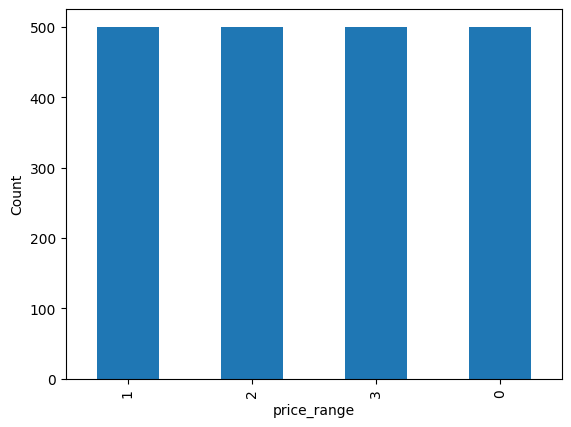

In [ ]:
#lets see the graph of price 

price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

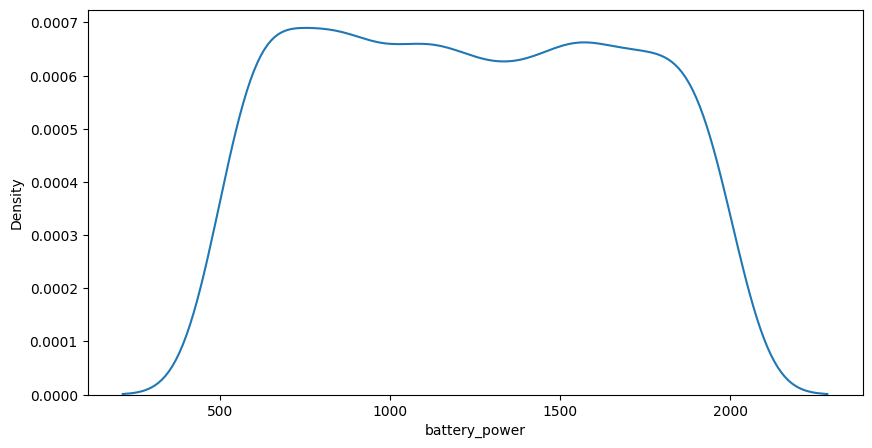

In [ ]:
#Battery power
plt.figure(figsize = [10,5])
sns.kdeplot(df['battery_power'])
plt.show()


In [ ]:
df.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1


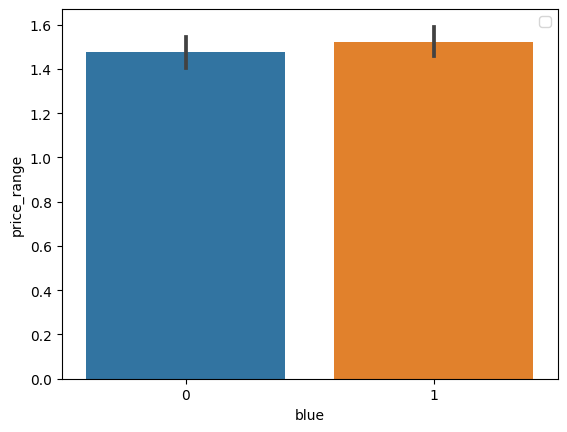

In [ ]:
#bluetooth

sns.barplot(data=df,x='blue',y='price_range')
plt.legend()
plt.show()

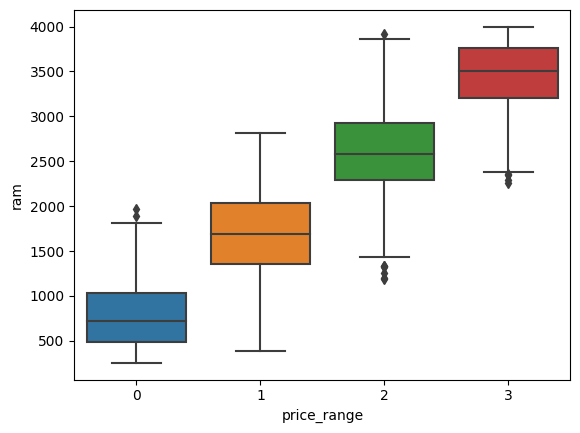

In [ ]:
sns.boxplot(data=df,x='price_range',y='ram')
plt.show()

<Axes: xlabel='px_width', ylabel='Density'>

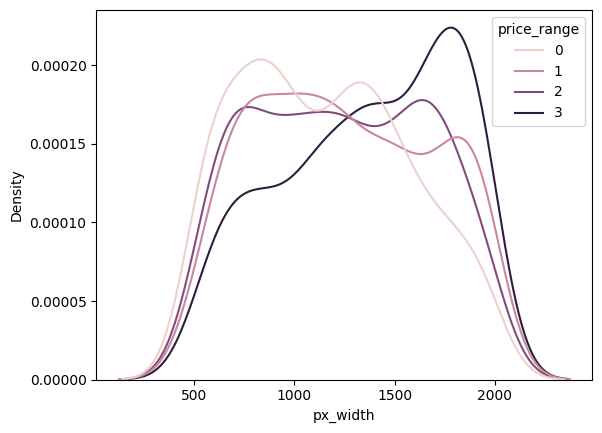

In [ ]:
sns.kdeplot(data=df, x='px_width', hue='price_range', )

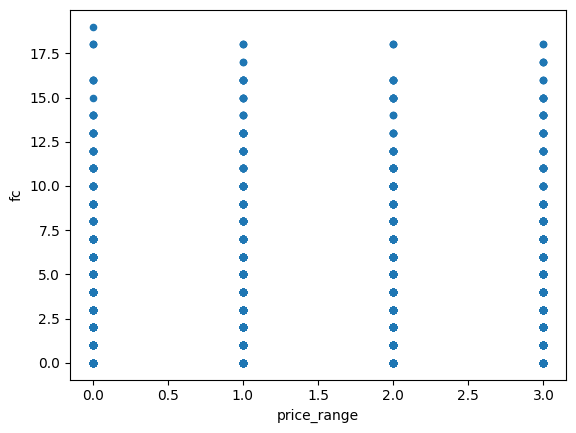

In [ ]:
#front camera megapixels

df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

In [ ]:
df.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

In [ ]:
df.shape

(2000, 19)

## **Correlation of target varaible i.e Dependent variable with the other independent variable.**

<Axes: >

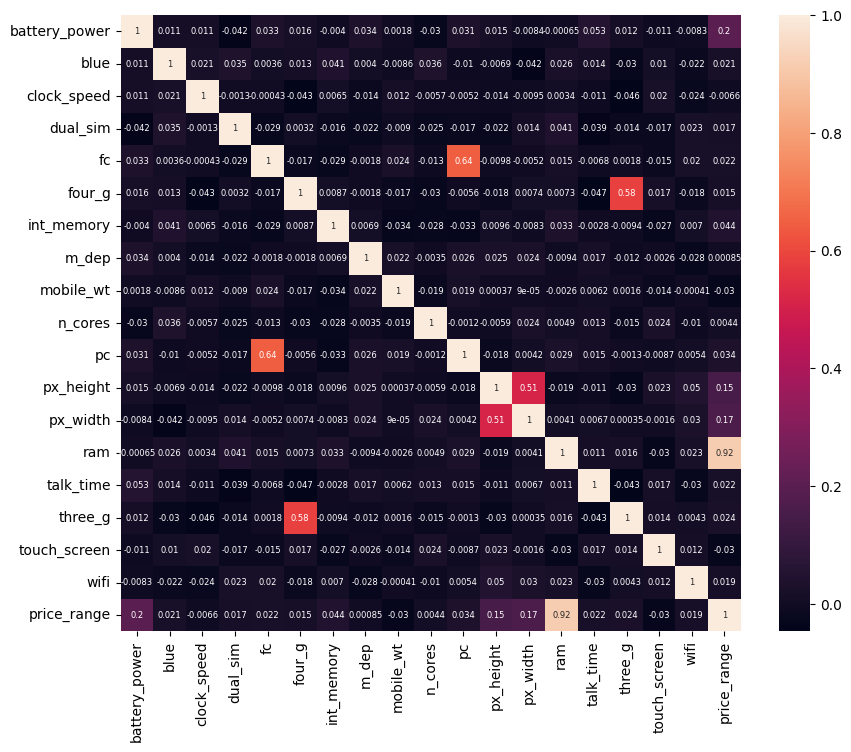

In [ ]:
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [10, 8])
sns.heatmap(correlation, annot_kws={'fontsize':6}, annot = True)

### **Observations:**
* ***RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.***
* ***Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.***
* ***Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.***

* ***Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.***

* ***primary camera i.e pc and front camera fc are positively correlated.***
* ***sc_h and sc_w are positively correlated.***

In [ ]:
df.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1,1


In [ ]:
#spliting the data 
x = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [ ]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222.0,1890,668,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915.0,1965,2032,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868.0,1632,3057,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336.0,670,869,19,1,1,1


In [ ]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [ ]:
#lets check the shape of x
print('shape of x is:', x.shape)
print('shape of y is:',y.shape)

shape of x is: (2000, 18)
shape of y is: (2000,)


In [ ]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)


In [ ]:
print("shape of x_train is ",x_train.shape)
print("shape of x_test is ",x_test.shape)
print("shape of y_train is ",y_train.shape)
print("shape of y_test is ",y_test.shape)


shape of x_train is  (1600, 18)
shape of x_test is  (400, 18)
shape of y_train is  (1600,)
shape of y_test is  (400,)


In [ ]:
y_train.shape

(1600,)

<b><h4>Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
y_pred = clsr.predict(x_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.895

In [ ]:
y_pred_train = clsr.predict(x_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

<b><h4>Decision tree 

In [ ]:
# Applying Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
# Prediction

y_pred_test = dtc.predict(x_test)
y_pred_train = dtc.predict(x_train)

In [ ]:
accuracy_score(y_test, y_pred_test)

0.7975

In [ ]:
# Evaluation metrics for test

print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        97
           1       0.77      0.73      0.75        96
           2       0.73      0.65      0.69       103
           3       0.81      0.88      0.84       104

    accuracy                           0.80       400
   macro avg       0.79      0.80      0.79       400
weighted avg       0.79      0.80      0.79       400



In [ ]:
# Cross validation

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.800 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.819 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.803 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.772 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.794 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [ ]:
# Prediction

y_pred_test = grid.predict(x_test)
y_pres_train = grid.predict(x_train)
# Evaluation metrics for test

print('Classification Report for Decision Tree (Test set)= ')
print(classification_report(y_test, y_pred_test))

Classification Report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       105
           1       0.74      0.85      0.79        91
           2       0.74      0.70      0.72        92
           3       0.87      0.88      0.88       112

    accuracy                           0.83       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.83      0.83       400



[[91 14  0  0]
 [ 5 77  9  0]
 [ 0 13 64 15]
 [ 0  0 13 99]]


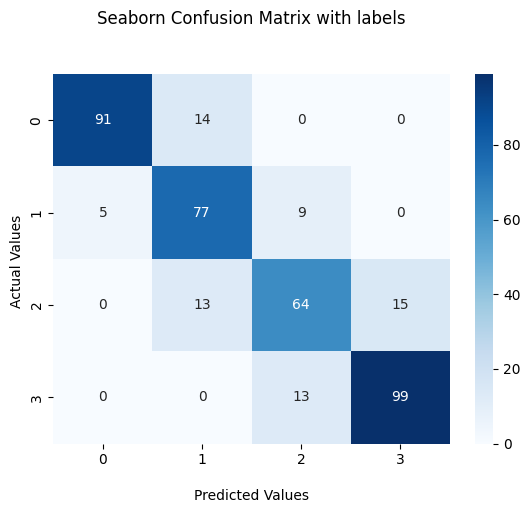

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

print('Classification Report for Decision Tree (Train set)= ')
print(classification_report(y_train, y_pred_train))

Classification Report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       395
           1       0.83      0.83      0.83       409
           2       0.80      0.82      0.81       408
           3       0.93      0.89      0.91       388

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600



##<b>Linear regression 


In [ ]:
# Applying logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Prediction

y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)
# Evaluation metrics for test

[[77 27  1  0]
 [17 45 21  8]
 [ 0 17 47 28]
 [ 0  2 28 82]]


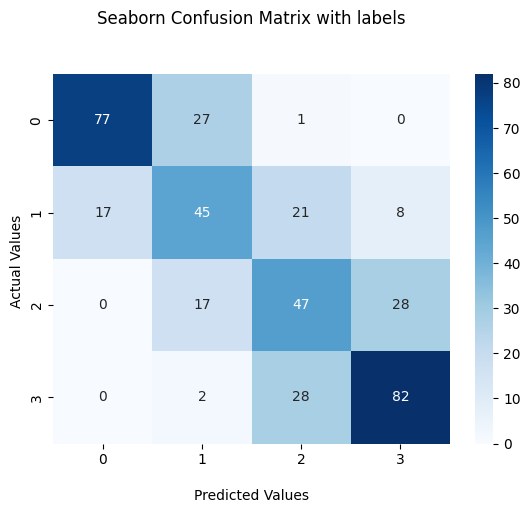

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))


Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       374
           1       0.54      0.57      0.55       391
           2       0.48      0.49      0.48       398
           3       0.75      0.67      0.71       437

    accuracy                           0.64      1600
   macro avg       0.64      0.64      0.64      1600
weighted avg       0.64      0.64      0.64      1600



##<b>Conclusion
* From EDA we can see that here are mobile phones in 4 price ranges. The number of elements is almost similar. 
* half the devices have Bluetooth, and half don’t there is a gradual increase in battery as the price range increases Ram has continuous increase with price range while moving from Low cost to Very high cost costly phones are lighter RAM, battery power, pixels played more significant role in deciding the price range of mobile phone. 
* form all the above experiments we can conclude that logistic regression and, XGboosting with using hyperparameters we got the best results